<a href="https://colab.research.google.com/github/mdaugherity/MachineLearning2024/blob/main/tutorial/Tutorial_05_A_Classifier_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

# Tutorial 5 - A Classifier Class
Dr. Daugherity, PHYS 453

VERY soon we will start using sklearn's built-in classifiers.  To make sure we understand what is going on under the hood, we will turn our homework 1 solution into a more user-friendly class.

**Classes for Novice Programmers**

The goal is to make a single package that contains our data with functions to act on it with an obvious interface.  In addition to the initialization function where we set the parameters, every sklearn classifier also has:


*  fit(X,y) - trains the classifier on features X that represent target y
*  predict(y) - uses the trained classifier to predict the target of the given features

The goal of this tutorial is to implement these functions for our lousy 1D classifier.

# Python Class Example
Python is a beautifully designed, clean, and simple language.  One thing that looks a bit ugly and feels clunky is in defining classes.  Remember that these design choices are based on removing any possible ambiguity about which variable we are using.

How to write python classes:
*   any variable saved into the class must start with a ```self.```  For example use ```self.x``` instead of ```x```  
*   functions must also take ```self``` as the first parameter
*   to initialize the object define a function called ```___init___```

An example will help




In [2]:
class example:

  def __init__(self,a=0,b=0):    # initialization function that runs automatically when we make an object
    self.a = a
    self.b = b

  def set(self,a,b):
    self.a = a
    self.b = b

  def show(self):
    print(self.a,self.b)

x = example()  # make an object of our class
x.show()
x.set(1,2)
x.show()

0 0
1 2


In [6]:
# Note that different objects store different values
y = example(99,-1234)
y.show()
x.show() # x is unchanged

99 -1234
1 2


In [7]:
y.b  # can access variables directly

-1234

# The Classifier Class
Now let's turn the *Brute Force Classifier*$^{TM}$ into a class that matches sklearn's syntax

In [17]:
class bfc:
  """Our 1D BRUTE FORCE CLASSIFIER!!!!!!"""""
  def __init__(self):
    self.thresh = 0

  def find_accuracy(self, feat, y, thresh):
    """Finds the accuracy using single feature data feat, targets y, and a threshold"""
    count = 0
    for i,xval in enumerate(feat):
      if xval < thresh:
        pred = 0
      else:
        pred = 1

      if y[i] == pred:
        count +=1
      #print(f"{X[i,col]}\t{xval} \t {thresh} \t {pred} \t {y[i]}")
    return count

  def fit(self, feat, y):
    """Finds the threshold for a single feature data feat and target y"""
    numthresh=1000
    thresholds = np.linspace(feat.min(), feat.max(),num=numthresh)
    A = np.zeros_like(thresholds)
    for i,thresh in enumerate(thresholds):
      A[i] = self.find_accuracy(feat, y, thresh)

    # in case of a tie argmax returns the first index only.  Loop over all ties to find the midpoint
    i = A.argmax()  # starting point
    AMAX = A.max()
    while A[i]==AMAX:
      #print(i,A[i], thresholds[i])
      i+=1
    t1 = thresholds[ A.argmax()] # start of tie
    t2 = thresholds[i-1] # end of tie
    self.thresh = (t1+t2)/2
    #print(f"Max accuracy is {A.max()} at threshold {thresh}")
    return

  def predict(self,X):
    y = np.zeros_like(X)
    for i in range(len(X)):
      if X[i] < self.thresh:
        y[i] = 0
      else:
        y[i] = 1
    return y


## Input Data


In [20]:
Xall, yall = datasets.load_iris(return_X_y=True)
X = Xall[yall<2]  # get rid of species 2
y = yall[yall<2]
X0 = X[:,0]  # feature 0

N2 = 50
np.random.seed(3)
Xtest2 = np.random.randn(N2*2)
ytest2 = np.hstack((np.zeros(N2),np.ones(N2)))

## Analysis
See how easy it is to use!


In [21]:
clf = bfc()
clf.fit(X0,y)
print(clf.thresh)

5.451351351351351


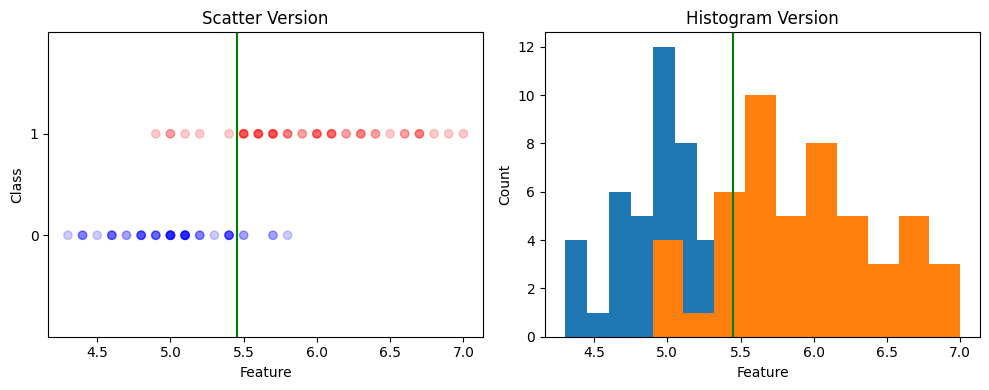

In [38]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(X0, y,c=y,cmap='bwr', alpha=0.2)
plt.axvline(clf.thresh,color='g')
plt.title('Scatter Version')
plt.ylim(-1, 2)
plt.yticks([0,1])
plt.ylabel('Class')
plt.xlabel('Feature')

plt.subplot(1,2,2)
#plt.scatter(X0, y,c=y,cmap='bwr', alpha=0.2)
plt.hist(X0[y==0])
plt.hist(X0[y==1])
plt.axvline(clf.thresh,color='g')
plt.title('Histogram Version')
plt.ylabel('Count')
plt.xlabel('Feature')

plt.tight_layout()
plt.show()

In [39]:
# How well did we do on the training data?
from sklearn.metrics import classification_report

y_pred = clf.predict(X0)
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        50
           1       0.90      0.88      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



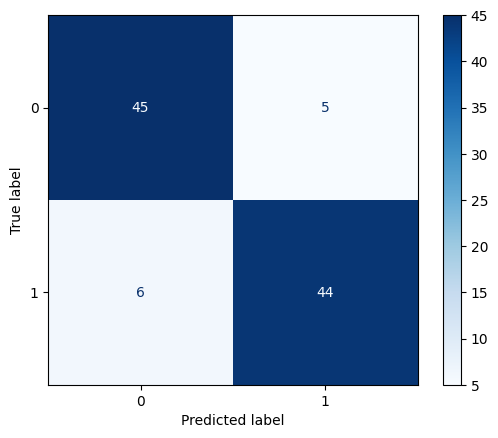

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y, y_pred, cmap="Blues")
plt.show()

In [43]:
# Predict new samples
X_pred = np.array([3,4,4.5,7,8,212345])
y_pred = clf.predict(X_pred)
print(y_pred)

[0. 0. 0. 1. 1. 1.]
